# PIA
# Parte I. Series de tiempo
*Estadística Aplicada*

**Integrantes**

Veronica Vanessa Aguilar Ortiz 1855188

Miguel Angel Jalomo Hernandez 1857876

**Grupo:** 051

In [411]:
# Librerias
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA


%matplotlib inline

In [422]:
#fijamos tamaño de graficas
plt.rcParams['figure.figsize'] = [20, 10]

In [413]:
datos= pd.read_csv('C:/Users/migue/Downloads/IGAE3.csv' ,index_col='Periodo',parse_dates=True)

In [414]:
datos.dropna(inplace=True)

In [415]:
#vemos los ultimos 10 datos
datos.tail(10)

,IGAE
Periodo,
2021-05-01,111.980980
2021-06-01,111.110974
2021-07-01,109.853143
2021-08-01,107.148949
2021-09-01,104.134227
2021-10-01,108.358461
2021-11-01,112.694729
2021-12-01,112.152267
2022-01-01,107.249365


In [416]:
type(datos.index)

pandas.core.indexes.datetimes.DatetimeIndex

**Series de tiempo**

**1. Añadirás una primera parte a la notebook llamada introducción. Hablaras
de la serie de tiempo que te toco analizar: ¿qué mide? ¿la frecuencia de
los datos? ¿se observa alguna tendencia? Y se puede añadir la gráfica de
la serie.**


Nuestra serie de tiempo mide el IGAE a traves del tiempo, en un periodo del 01/12/2007 al 01/02/2022, el IGAE es El Indicador Global de la Actividad Económica este nos permite conocer y dar seguimiento a la evolución mensual del sector real de la economía. Podemos notar en la grafica que hay una tendencia a la alza ya que este indice tiene un aumento con el tiempo.

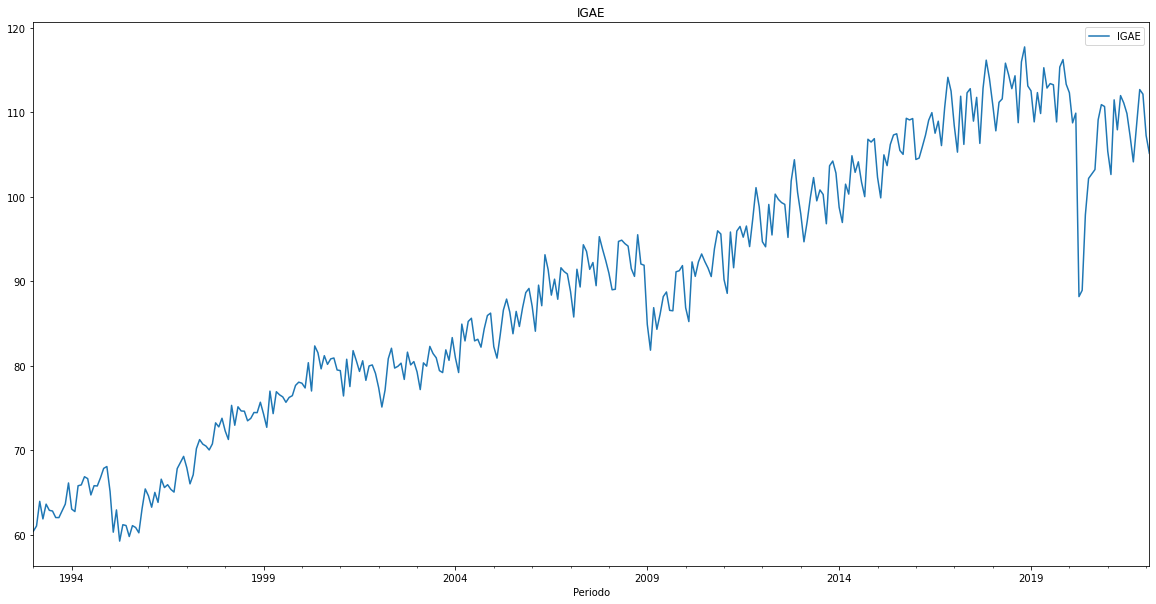

In [423]:
# Gráfica
datos.plot()
plt.title('IGAE')
plt.show()

**2. Comenta acerca de si se observa cierta estacionalidad en la serie, en que
meses aumenta la variable ¿por qué?, en qué meses disminuye la variable
¿por qué?**

Podemos notar una estacionalidad en la serie, ya que en los meses de abril, julio septiembre y diciembre IGAE aumenta, y por otro lado, en los meses de mayo, agosto, noviembre este indice disminuye. Tambien podemos notar que en el mes de marzo del 2020 se registro un gran desplome que se mantuvo durante un tiempo hasta que volvio a aumentar en julio del mismo año.

**3. Uno los propósitos fundamentales del análisis de series de tiempo es el
pronóstico, es decir, “anticipar valores futuros de la variable”. Comenta
para quién es importante conocer el pronostico de la serie de tiempo que
analizaras y por qué es importante conocer el pronóstico de dicha serie
de tiempo.**

El IGAE es muy importante ya que nos ofrece una visión oportuna, completa y coherente de la evolución de la actividad económica del país, proporcionando información oportuna, para apoyar en la toma de decisiones. Su pronóstico podria ser muy importante para el gobierno de un pais ya que como ya mencionamos, es de gran utilidad en la toma de decisiones.

**4. Añade las estadísticas descriptivas de la serie de tiempo (guíate de la
notebook del análisis de las acciones de waltmart)**

In [338]:
## Calcular los retornos
datos['retorno_simple'] = datos.IGAE.pct_change()

In [339]:
print('Numero de observaciones:', datos.shape[0])
print(f'Media: {datos.retorno_simple.mean():.4f}')
print(f'Mediana: {datos.retorno_simple.median():.4f}')
print(f'Mínimo: {datos.retorno_simple.min():.4f}')
print(f'Máximo: {datos.retorno_simple.max():.4f}')
print(f'Desviación Estándar: {datos.retorno_simple.std():.4f}')
print(f'Skewness (símetría): {datos.retorno_simple.skew():.4f}') ## que tan centrada esta la dist
print(f'Kurtosis: {datos.retorno_simple.kurtosis():.4f}')     ## que tan alta esta la dist

Numero de observaciones: 350
Media: 0.0021
Mediana: -0.0016
Mínimo: -0.1976
Máximo: 0.1005
Desviación Estándar: 0.0329
Skewness (símetría): -0.2042
Kurtosis: 3.2990


**5. Para ver mejor el comportamiento de la variable aplica un promedio
móvil (3-6 meses)**


In [340]:
# Vamos a calcular el promedio movil de la acción a 3 y 6 meses

datos['MA3'] = datos['IGAE'].rolling(90).mean()
datos['MA6'] = datos['IGAE'].rolling(180).mean()
datos = datos.dropna()
datos.head()

,IGAE,retorno_simple,MA3,MA6
Periodo,,,,
2007-12-01,92.457199,-0.014413,83.954806,76.394175
2008-01-01,90.954348,-0.016255,84.080635,76.563879
2008-02-01,88.989333,-0.021604,84.167286,76.719250
2008-03-01,89.053256,0.000718,84.266046,76.858750
2008-04-01,94.715328,0.063581,84.420554,77.041247


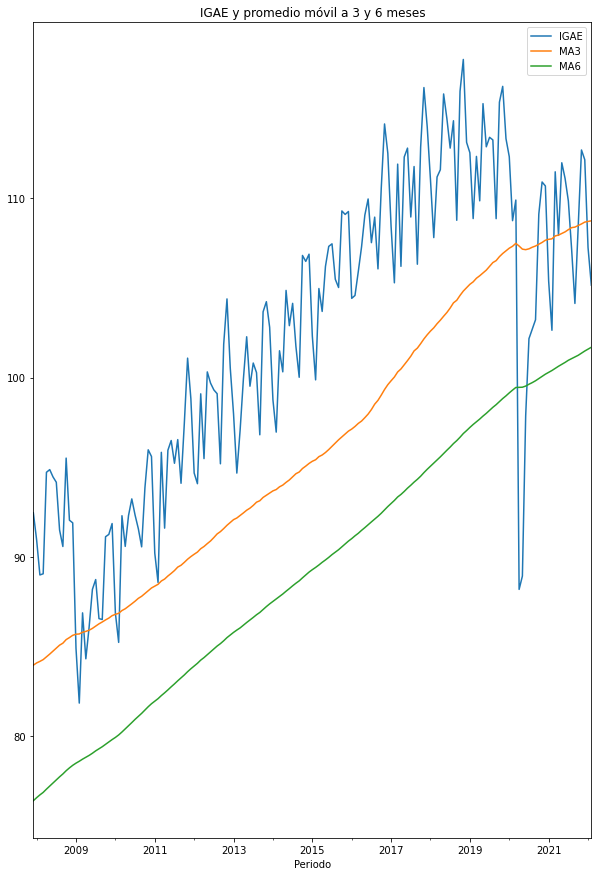

In [341]:
# Vamos a graficar
datos[['IGAE', 'MA3', 'MA6']].plot(figsize=(10,15))
plt.title('IGAE y promedio móvil a 3 y 6 meses')
plt.show()

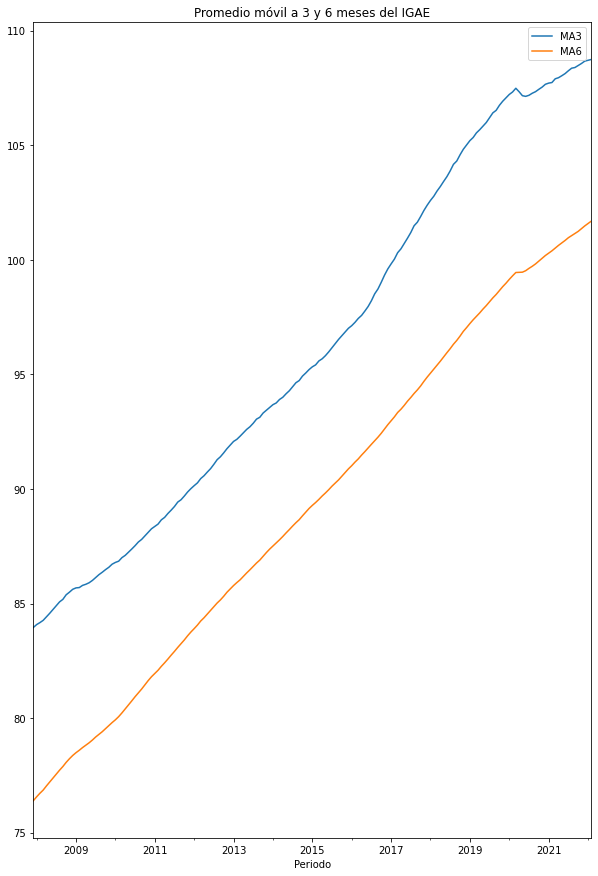

In [342]:
# Vamos a graficar el promedio movil
datos[[ 'MA3', 'MA6']].plot(figsize=(10,15))
plt.title('Promedio móvil a 3 y 6 meses del IGAE')
plt.show()

**6. Utiliza la descomposición estacional, para obtener el componente
estacional, y la serie desestacionalizada.**

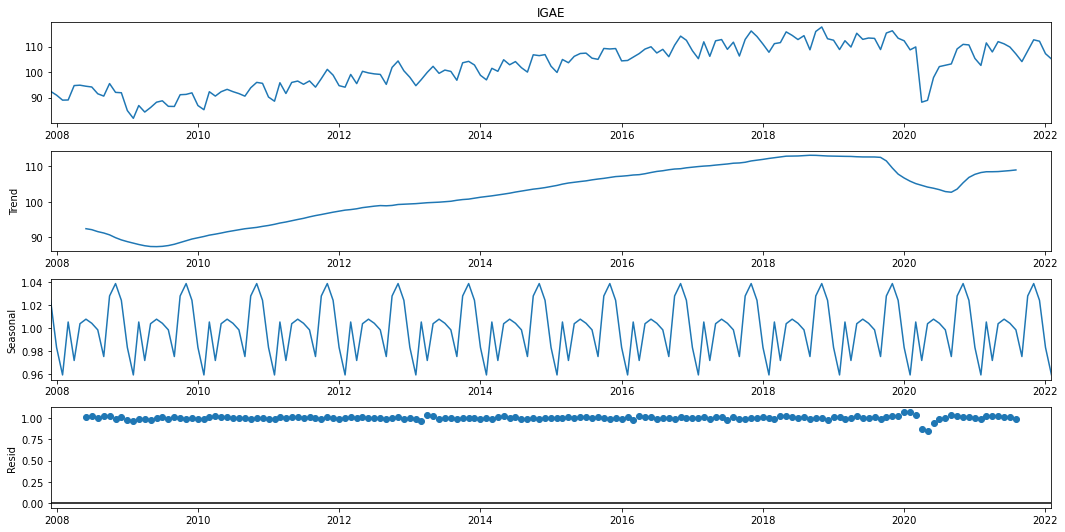

In [343]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(datos['IGAE'], model='multiplicative')  
result.plot();

In [344]:
#vamos a obtener la serie desestacionalida
#primero obtenemos el componente estacional al que accedemos con .seasonal del objeto result
componente_estacional = result.seasonal
datos['desestacionalizado'] = datos['IGAE'] / componente_estacional

<ipython-input-344-6a7ab13187e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['desestacionalizado'] = datos['IGAE'] / componente_estacional


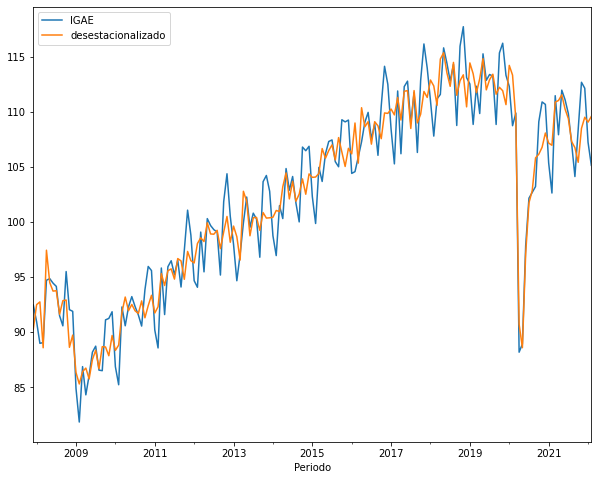

In [345]:
#graficamos
datos[['IGAE','desestacionalizado']].plot(figsize=(10,8));

**7. Utiliza la serie desestacionalizada para hacer el análisis ARIMA**

In [346]:
# estimamos un ARIMA (1,1)
modelo = ARIMA(datos['desestacionalizado'], order=(1, 1, 1))
resultado = modelo.fit()
resultado.summary()

C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  171
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -392.502
Date:                Mon, 23 May 2022   AIC                            791.004
Time:                        15:28:28   BIC                            800.411
Sample:                    12-01-2007   HQIC                           794.821
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6473      0.134      4.821      0.000       0.384       0.910
ma.L1         -0.8468      0.117     -7.217      0.000      -1.077      -0.617
sigma2         5.9210      0.201     29.479      0.000       5.527       6.315
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              4241.21
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                            -2.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**8. Realiza una prueba de raíz unitaria para verificar si este proceso es
estacionario (sino es estacionario conviértelo en estacionario)**


In [347]:
# Hacemos la prueba de dickey fuller aumentada ADF
adf = adfuller(datos['desestacionalizado'])

#presentamos el p-value
print('p-value: %f' % adf[1])

p-value: 0.674745


Recuerda que $H_0$: serie no estacionaria

In [348]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value = 0.675
 NO se rechaza hipótesis nula, serie no estacionaria


In [349]:
datos_diff = datos['desestacionalizado'] - datos['desestacionalizado'].shift()

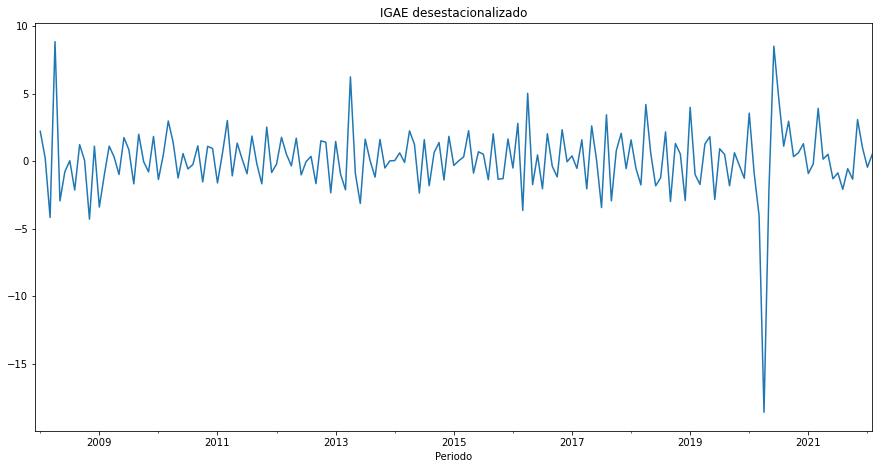

In [350]:
# Graficamos el tipo de cambio diferenciado
datos_diff.plot()
plt.title('IGAE desestacionalizado')
plt.show()

In [351]:
# Eliminamos los Nan
datos_diff = datos_diff.dropna()

datos_diff

Periodo
2008-01-01    2.215035
2008-02-01    0.247268
2008-03-01   -4.163386
2008-04-01    8.859654
2008-05-01   -2.939396
                ...   
2021-10-01   -1.333843
2021-11-01    3.084814
2021-12-01    1.007165
2022-01-01   -0.445424
2022-02-01    0.522948
Name: desestacionalizado, Length: 170, dtype: float64

Volvemos a realizar la prueba de raíz unitaria ADF

In [352]:
adf1 = adfuller(datos_diff)
if adf1[1] < 0.05:
    
    print(f'con un un p-value={adf1[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf1[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 


con un un p-value=9.896124141002856e-15
 Se rechaza hipótesis nula, serie estacionaria


**9. Con el proceso estacionario, realiza las gráficas de autocorrelación (ACF)
y autocorrelación parcial (PACF) y señala como se interpretan y ¿qué tipo
de proceso es tu serie de tiempo AR(p), MA(q) o ARMA(p,q)?**

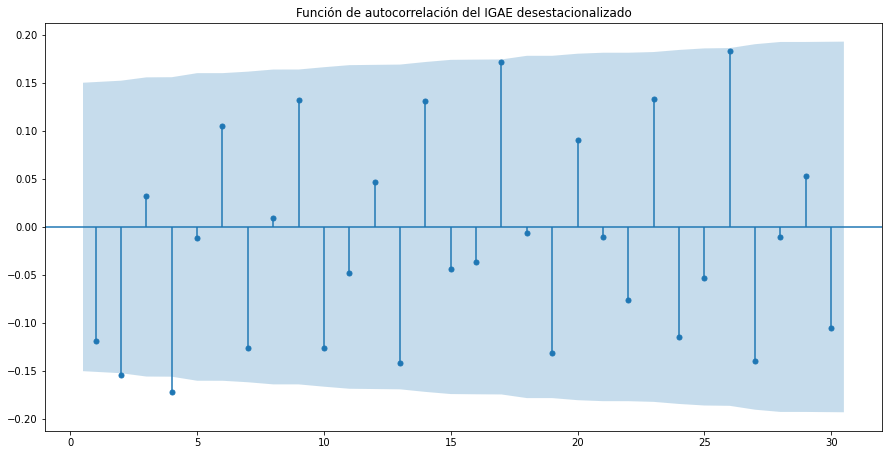

In [377]:
# Grafica de autocorrelación ACF
plot_acf(datos_diff, zero=False, lags=30)
plt.title('Función de autocorrelación del IGAE desestacionalizado')
plt.show()

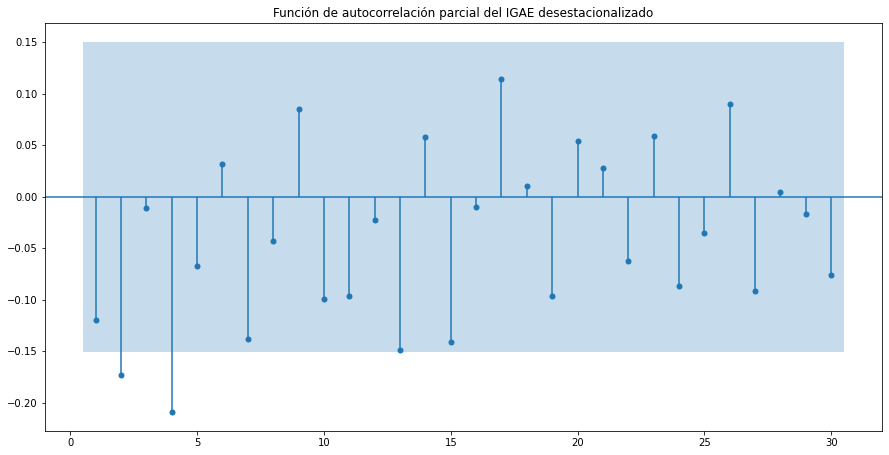

In [354]:
# Grafica de autocorrelación parcial PACF
plot_pacf(datos_diff, zero=False, lags=30)
plt.title('Función de autocorrelación parcial del IGAE desestacionalizado')
plt.show()

Como podemos notar en nuestras gráficas en ambos casos, solo el segundo y cuarto rezago son significativos, por lo cual podria indicarnos que nuestra serie de tiempo es un  proceso ARMA 2,2

**10. Estima el modelo ARMA que hayas elegido e interpreta los coeficientes**

In [388]:
# Estimamos un ARMA (2,2), como la serie se tuvo que diferenciar una vez para 
# volverla estacionaria, en realidad tenemos un ARIMA (2,1,2) 
modelo = ARIMA(datos['IGAE'], order=(2, 1, 2))
resultado = modelo.fit()
resultado.summary()

C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  171
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -451.786
Date:                Mon, 23 May 2022   AIC                            913.572
Time:                        17:13:57   BIC                            929.251
Sample:                    12-01-2007   HQIC                           919.934
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3084      0.177     -1.741      0.082      -0.656       0.039
ar.L2          0.2995      0.187      1.601      0.109      -0.067       0.666
ma.L1          0.0125      0.163      0.076      0.939      -0.308       0.333
ma.L2         -0.7098      0.156     -4.539      0.000      -1.016      -0.403
sigma2        11.8664      0.640     18.546      0.000      10.612      13.120
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               948.86
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                            -1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [389]:
datos['pronostico'] =resultado.predict()

In [390]:
MAPE = 0
MAD = 0
MSD = 0

for t in range (1,171):
   MAPE = MAPE + abs(((datos['IGAE'][t] - datos['pronostico'][t])/datos['IGAE'][t]))
   MAD = MAD + abs((datos['IGAE'][t] - datos['pronostico'][t]))
   MSD = MSD + abs((datos['IGAE'][t] - datos['pronostico'][t])**2)

MAPE = MAPE/171
MAD = MAD/171
MSD = MSD/171

print(f' El valor de la medida MAPE para el modelo ARMA(2,2) : {MAPE}')
print(f' El valor de la medida MAD para el modelo ARMA(2,2) : {MAD}')
print(f' El valor de la medida MSD para el modelo ARMA(2,2) : {MSD}')

 El valor de la medida MAPE para el modelo ARMA(2,2) : 0.025173840408363544
 El valor de la medida MAD para el modelo ARMA(2,2) : 2.548410177100147
 El valor de la medida MSD para el modelo ARMA(2,2) : 11.815519153451913


**11. Estima otros tres modelos que consideres posibles para tu serie de
tiempo. Obtén el criterio akaike (AIC) para cada uno, el criterio bayesiano
de información (BIC), y calcula una de las siguientes tres medidas (la que
quieras) MAPE, MAD, y MSD.**

In [391]:
# 1.- Estimamos un AR (2), como la serie se tuvo que diferenciar una vez para 
# volverla estacionaria, en realidad tenemos un ARIMA (2,1,0)
modelo = ARIMA(datos['IGAE'], order=(2, 1, 0))
resultado1 = modelo.fit()
resultado1.summary()

C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  171
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -461.896
Date:                Mon, 23 May 2022   AIC                            929.793
Time:                        17:15:51   BIC                            939.200
Sample:                    12-01-2007   HQIC                           933.610
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2112      0.082     -2.571      0.010      -0.372      -0.050
ar.L2         -0.1782      0.073     -2.456      0.014      -0.320      -0.036
sigma2        13.4049      0.780     17.183      0.000      11.876      14.934
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               324.58
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                            -1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [392]:
datos['pronostico1'] =resultado1.predict()

In [393]:
MAPE1 = 0
MAD1 = 0
MSD1 = 0

for t in range (1,171):
   MAPE1 = MAPE1 + abs(((datos['IGAE'][t] - datos['pronostico1'][t])/datos['IGAE'][t]))
   MAD1 = MAD1 + abs((datos['IGAE'][t] - datos['pronostico1'][t]))
   MSD1 = MSD1 + abs((datos['IGAE'][t] - datos['pronostico1'][t])**2)

MAPE1 = MAPE1/171
MAD1 = MAD1/171
MSD1 = MSD1/171

print(f' El valor de la medida MAPE para el modelo AR(2) : {MAPE1}')
print(f' El valor de la medida MAD para el modelo AR(2) : {MAD1}')
print(f' El valor de la medida MSD para el modelo AR(2) : {MSD1}')

 El valor de la medida MAPE para el modelo AR(2) : 0.02774457904676568
 El valor de la medida MAD para el modelo AR(2) : 2.806871820480959
 El valor de la medida MSD para el modelo AR(2) : 13.328356096077037


In [394]:
# 2.- Estimamos un MA (2),como la serie se tuvo que diferenciar una vez para 
# volverla estacionaria, en realidad tenemos un ARIMA (0,1,2)
modelo = ARIMA(datos['IGAE'], order=(0, 1, 2))
resultado2 = modelo.fit()
resultado2.summary()

C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  171
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -454.796
Date:                Mon, 23 May 2022   AIC                            915.593
Time:                        17:16:58   BIC                            925.000
Sample:                    12-01-2007   HQIC                           919.410
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3509      0.056     -6.271      0.000      -0.461      -0.241
ma.L2         -0.3100      0.098     -3.154      0.002      -0.503      -0.117
sigma2        12.3015      0.686     17.924      0.000      10.956      13.647
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               842.97
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [395]:
datos['pronostico2'] =resultado2.predict()

In [396]:
MAPE2 = 0
MAD2 = 0
MSD2 = 0

for t in range (1,171):
   MAPE2 = MAPE1 + abs(((datos['IGAE'][t] - datos['pronostico2'][t])/datos['IGAE'][t]))
   MAD2 = MAD1 + abs((datos['IGAE'][t] - datos['pronostico2'][t]))
   MSD2 = MSD1 + abs((datos['IGAE'][t] - datos['pronostico2'][t])**2)

MAPE2 = MAPE2/171
MAD2 = MAD2/171
MSD2 = MSD2/171

print(f' El valor de la medida MAPE para el modelo MA(2) : {MAPE2}')
print(f' El valor de la medida MAD para el modelo MA(2) : {MAD2}')
print(f' El valor de la medida MSD para el modelo MA(2) : {MSD2}')

 El valor de la medida MAPE para el modelo MA(2) : 0.00031289478705958545
 El valor de la medida MAD para el modelo MA(2) : 0.032255508628462916
 El valor de la medida MSD para el modelo MA(2) : 0.12085416800079822


In [397]:
# 3.- Estimamos un ARMA (4,4), como la serie se tuvo que diferenciar una vez para 
# volverla estacionaria, en realidad tenemos un ARIMA (4,1,4)
modelo = ARIMA(datos['IGAE'], order=(4, 1, 4))
resultado3 = modelo.fit()
resultado3.summary()

C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\migue\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  171
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -429.392
Date:                Mon, 23 May 2022   AIC                            876.784
Time:                        17:19:33   BIC                            905.006
Sample:                    12-01-2007   HQIC                           888.236
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3440      0.263     -5.116      0.000      -1.859      -0.829
ar.L2         -0.4991      0.317     -1.574      0.116      -1.121       0.123
ar.L3          0.1044      0.233      0.448      0.654      -0.352       0.561
ar.L4         -0.1607      0.215     -0.748      0.455      -0.582       0.260
ma.L1          1.2810      0.253      5.058      0.000       0.785       1.777
ma.L2         -0.0143      0.262     -0.054      0.957      -0.529       0.500
ma.L3         -0.9097      0.211     -4.306      0.000      -1.324      -0.496
ma.L4         -0.2914      0.223     -1.309      0.191      -0.728       0.145
sigma2         8.7614      0.612     14.315      0.000       7.562       9.961
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1013.72
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                            -1.79
Prob(H) (two-sided):                  0.01   Kurtosis:                        14.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [398]:
datos['pronostico3'] =resultado3.predict()

In [399]:
MAPE3 = 0
MAD3 = 0
MSD3 = 0

for t in range (1,171):
   MAPE3 = MAPE3 + abs(((datos['IGAE'][t] - datos['pronostico3'][t])/datos['IGAE'][t]))
   MAD3 = MAD3 + abs((datos['IGAE'][t] - datos['pronostico3'][t]))
   MSD3 = MSD3 + abs((datos['IGAE'][t] - datos['pronostico3'][t])**2)

MAPE3 = MAPE3/171
MAD3 = MAD3/171
MSD3 = MSD3/171

print(f' El valor de la medida MAPE para el modelo ARMA(4,4) : {MAPE3}')
print(f' El valor de la medida MAD para el modelo ARMA(4,4) : {MAD3}')
print(f' El valor de la medida MSD para el modelo ARMA(4,4) : {MSD3}')

 El valor de la medida MAPE para el modelo ARMA(4,4) : 0.02169776565327626
 El valor de la medida MAD para el modelo ARMA(4,4) : 2.1899363903785414
 El valor de la medida MSD para el modelo ARMA(4,4) : 9.016741663332736


**12. ¿Qué modelo se debería estimar según AIC?**

Según AIC se deberia estimar un modelo ARMA(2,2)

**13.¿Qué modelo se debe estimar según BIC?**

Según BIC se deberia estimar un modelo MA(2)

**14. Qué modelo se debe estimar según la medida elegida (MAPE, MAD,
¿MSD)?**

Ya que las tres medidas son menores tomaremos el modelo MA(2) para hacer el pronóstico.

**15. Elige un modelo para hacer pronósticos, y pronóstica uno, dos, tres,
cuatro y cinco periodos. Recuerda que el pronóstico tiene que estar en la
escala de la variable original.**

In [401]:
# vamos a estimar la serie con el modelo MA(2)
datos['pronostico3'] = resultado3.predict()
datos['pronostico3'][0] = datos['IGAE'][0]

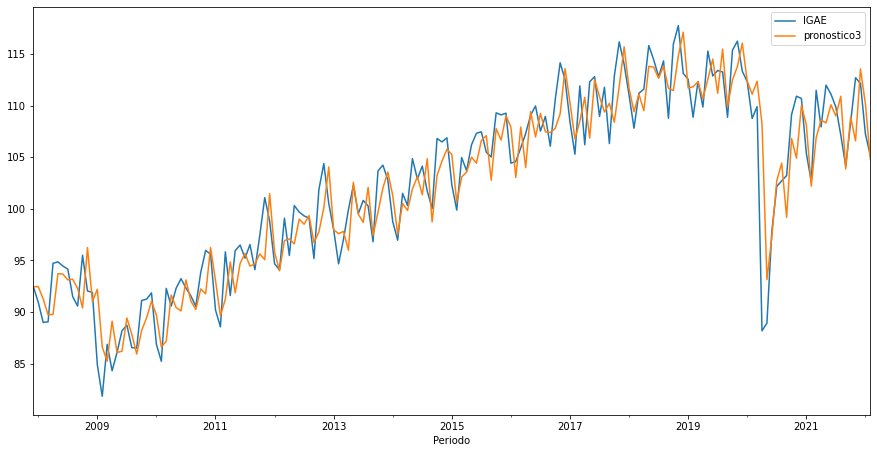

In [402]:
datos[['IGAE', 'pronostico3']].plot()
plt.show()

In [403]:
#calculamos cuantas observaciones tenemos para hacer nuestra predicción
len(datos)

171

In [424]:
## Vamos a pronosticar los proximos 5 dias
resultado3.predict(169, 175)

2022-01-01    110.166645
2022-02-01    104.773855
2022-03-01    109.686262
2022-04-01    107.266046
2022-05-01    109.328713
2022-06-01    108.463542
2022-07-01    107.615935
Freq: MS, Name: predicted_mean, dtype: float64

**16. Por último, comenta que debilidades o limitaciones tienen los modelos
ARIMA**

• Son pobres para predecir en momentos de
cambios estructurales y puntos de giro.

• Son de memoria corta. El horizonte de
pronóstico es a veces muy corto.

• Menos eficiente en el uso de la información 